![fraud](credit.png)

In [2]:
# Importing required libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [3]:
# importing dataset

df = pd.read_csv("D:\data science internship\Fraud.csv")
print('df.shape:', df.shape)
df.head()


df.shape: (6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


> Exploring transaction type

In [6]:

print(df.type.value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


In [7]:
type = df["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(df, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Distribution of Transaction Type")
figure.show()

##### Now let’s transform the categorical features into numerical of columns that will bne used i.e `type`.

In [8]:
df["type"] = df["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})

## 1. Data cleaning including missing values , outliers and multi-collinearlity.

### Missing values

In [9]:
# taking out the sum of the null values of every column
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
# dropping the null values of the dataframe 
df.dropna()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,2,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,2,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


##### Here in the following database there are no null values in every column so by dropppiing the null valeus form the database will give us nothing other than our previuos dataframe.

### Outliers

<AxesSubplot:xlabel='amount'>

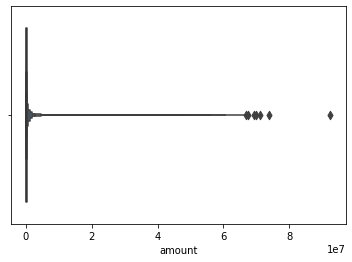

In [11]:
# plotting a box plot to see the outlier values 
sns.boxenplot(x=df['amount'])

###### Here we can see the outlier values on the right side of the graph with the diamonds. So we need to remove them to make our data more statistically significant. 

In [12]:
# defining the fucntion to return the lower and upper range by finding the 
# inter-quartile range of the database
 
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [13]:
# removing the outliers of amount from the database.

lowerbound,upperbound = outlier_treatment(df.amount)

df = df[(df.amount < lowerbound) | (df.amount > upperbound)]

<AxesSubplot:xlabel='amount'>

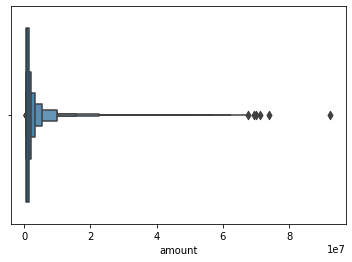

In [14]:
sns.boxenplot(x=df['amount'])

> Here we can clearly see that our data has become more statistically sigficant in order to perform any kind of analysis over it.

### Dropping the unnecessary factors (or Columns) from to data.

#### When we got to take nameOrig, NameDest and type factor of the dataset and compare to the other factors that are in the column we can see that these factor dont really do affect on predicting as they have mostly unique values for every row and using that as a facotr to predict data is not a good habit as this will not help us decrease the accuracy. 

In [15]:
# dropping the unceceary columns which would not be rerquired for training the model
df = df.drop(['nameOrig','nameDest'],axis=1)
df 


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
85,1,4,1505626.01,0.00,0.0,29031.00,5515763.34,0,0
86,1,4,554026.99,0.00,0.0,579285.56,0.00,0,0
88,1,4,761507.39,0.00,0.0,1280036.23,19169204.93,0,0
89,1,4,1429051.47,0.00,0.0,2041543.62,19169204.93,0,0
93,1,4,583848.46,0.00,0.0,667778.00,2107778.11,0,0
...,...,...,...,...,...,...,...,...,...
6362613,743,1,1258818.82,1258818.82,0.0,503464.50,1762283.33,1,0
6362616,743,4,6311409.28,6311409.28,0.0,0.00,0.00,1,0
6362617,743,1,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0
6362618,743,4,850002.52,850002.52,0.0,0.00,0.00,1,0


## Multi-Colinearity

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# defining the fucntion to calculation varinace inflation to find the multi colinearity
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [17]:
X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,step,3.419435
1,type,3.589421
2,amount,6.682123
3,oldbalanceOrg,28.472607
4,newbalanceOrig,27.406349
5,oldbalanceDest,27.450798
6,newbalanceDest,43.642477
7,isFraud,1.811865


> Here we can see that columns [ oldbalanceOrg , newbalanceOrig, oldbalanceDest , newbalanceDest ] have VIF > 10, so we either need to drop the columns or have to fix it to reduce the precision of the estimated coefficients, which would weaken the statistical power of our regression model.

In [18]:
# making a copy of database to perform and test the operations.
df2 = df.copy()

#### Now we need to fix the columns.
1. So for the first pair of columns oldbalanceOrg and newbalanceOrig , we can combine both of these columns into a new column by finding the difference as here we have the details of balance before and after transaction. 
2. For the second pair of columns newbalanceDest and oldbalanceDest , we do the same difference opration as these are also the recipents balance before and after the transaction and combining to a new column.

In [19]:
df2['Diff (old & new) Balance Org'] = df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
df2['Diff (new & old) Balance Dest'] = df.apply(lambda x: x['newbalanceDest'] - x['oldbalanceDest'],axis=1)

# Droppping the left out columns which will no longer be needed.
y = df2.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'],axis=1)


##### Moving the newly made columns to the proper indexes as earlier 

In [20]:
mid = y['Diff (old & new) Balance Org']
y.drop(labels=['Diff (old & new) Balance Org'], axis=1,inplace = True)
y.insert(3, 'Diff (old & new) Balance Org', mid)

In [21]:
mid = y['Diff (new & old) Balance Dest']
y.drop(labels=['Diff (new & old) Balance Dest'], axis=1,inplace = True)
y.insert(4, 'Diff (new & old) Balance Dest', mid)

In [22]:
# Now calculation the VIF of the newly made columns along others.
calc_vif(y)

,variables,VIF
0,step,3.409075
1,type,3.577416
2,amount,5.954428
3,Diff (old & new) Balance Org,1.778886
4,Diff (new & old) Balance Dest,5.074027
5,isFraud,1.786496
6,isFlaggedFraud,1.006960


###### Now here we can see that we have removed multi-collinearity as all the columns VIF < 10.

In [23]:
# now making the original dataframe same as of the database that
# we copied and performed operations.
df = y

# 2. Describe your fraud detection model in elaboration.


* As we have the data and by observing it we can make use of the assumption that fraudulent patterns can be learned from an analysis of past transactions. That is why we will be using `Supervised Learning` .
#
* We can split the table horizontally into different sets. Each set will have all the features, but not all the observations.
#
* For the training set, we can use the `isFraud` column value to train our model. Applying the model on the testing set will give us the predicted isFraud value for each observation.
#
* Find the `ROC AUC` score instead of accuracy. This score measures the ability of our model to distinguish between classes.
#
* To level the playing field for our models, we can over-sample the fraud transactions, or under-sample the clean ones. We can do this using the `imbalance-learn library`.
#
* Split the dataset into 3 parts — `training, validation, and test datasets`. The validation dataset we can use again and again with different models. Once we think we’ve got the best model, we will use our testing dataset.
#
* We will use `LogisticRegression` with class weights to balance it, without resampling of a fresh database with slightly imbalanced parameter.
#
* At first we would test the moedl on test set and then later on the full(unsmapled ) dataset.

# 3. How did you select your variables to be included in the model ? 

* At frist we select `IsFraud` column to train in our model as that is the given output that we have to predict and tell the company to flag it.
#
* Other cloumns that are taken are ` [ step , type , amount , oldbalanceOrg ,  newbalanceOrig , oldbalanceDest ,  oldbalanceDest ] `. These are taken in consideration to predict for our model as they have the values of `time of transaction, amount of the transaction , initial balance and after balance & balnces of the recipent `. These are much and much sigficant values of these columns to detct fraud as the by the time and money transaction only we can get wheather it is fraud or not.
#
* We drop `[ nameOrig, nameDest ]` as these values are not really that much significant compared to those above also their variance will be much and much high as most of the values are unque and different and a person can create  many fake acoounts with fake names.

# 4. Demonstrate the performance of the model by using best set of tools.

In [24]:
pd.value_counts(df.isFraud, normalize = True)

0    0.9886
1    0.0114
Name: isFraud, dtype: float64

##### Here as we are using `IsFraud` so we apply the model on the testing set will give us the predicted values of each observation.

In [25]:
from sklearn.metrics import accuracy_score, classification_report

majority_class = df.isFraud.mode()[0]
y_pred = np.full(shape = df.isFraud.shape, fill_value = majority_class)
accuracy_score(df.isFraud, y_pred)

print(classification_report(df.isFraud, y_pred))

c:\Users\karti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       0.99      1.00      0.99    334224
           1       0.00      0.00      0.00      3854

    accuracy                           0.99    338078
   macro avg       0.49      0.50      0.50    338078
weighted avg       0.98      0.99      0.98    338078



c:\Users\karti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\karti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#### We get the accuracy score as `0.9886` , which tells we have more values of isFraud = 0 compared to isFraud = 1. 

In [26]:
# Here we found the ROF Accuracy (instead ) to measure the
# ability of our model to distinigsh between classes.
from sklearn.metrics import roc_auc_score

roc_auc_score(df.isFraud, y_pred)

0.5

#### Leveling the playing field for our models, we can over-sample the fraud transactions, or under-sample the clean ones. We can do this using the imbalance-learn library.

* Here sampling_strategy for the RandomUnderSampler is set to 0.8.

In [27]:
from imblearn.under_sampling import RandomUnderSampler

X = df.drop(['isFraud'], axis = 1)
y = df.isFraud
rus = RandomUnderSampler(sampling_strategy=0.8)
X_res, y_res = rus.fit_resample(X, y)
print(X_res.shape, y_res.shape)
print(pd.value_counts(y_res))

(8671, 6) (8671,)
0    4817
1    3854
Name: isFraud, dtype: int64


#### Updated table after the resampling, and dropping those columns:

In [28]:
cols_numeric = ['step', 'type',  'amount', 'Diff (old & new) Balance Org',
                 'Diff (new & old) Balance Dest', 'isFlaggedFraud']
df_rus = pd.DataFrame(X_res, columns = cols_numeric)
df_rus.head()

,step,type,amount,Diff (old & new) Balance Org,Diff (new & old) Balance Dest,isFlaggedFraud
0,283,4,1104115.00,0.0,1104115.00,0
1,353,4,4501470.18,226.0,4501470.18,0
2,396,4,827582.17,110251.0,827582.16,0
3,137,4,1468923.26,0.0,1468923.27,0
4,179,1,532234.17,65879.0,532234.17,0


#### Splitting the datset into 3 parts - training, validation, and test datasets. The validation dataset we can use again and again with different models.

In [29]:
from sklearn.model_selection import train_test_split

# defining fucntion to spilt the dataset in the folowing way : 
def train_validation_test_split( X, y, train_size=0.8, val_size=0.1, test_size=0.1, random_state=None, shuffle=True):
    
    assert int(train_size + val_size + test_size + 1e-7) == 1
    X_train_val, X_test, y_train_val, y_test = train_test_split( X, y, test_size=test_size, random_state=random_state, shuffle=shuffle)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=val_size/(train_size+val_size), random_state=random_state, shuffle=shuffle)

    return X_train, X_val, X_test, y_train, y_val, y_test


In [30]:
# Splitiing the dataset 
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(X_res, y_res, train_size=0.8, val_size=0.1, test_size=0.1, random_state=1)
class_weight = {0: 4, 1: 5}

#### Here we are using Logistic Regression Model to train the dataset with wieghts to balance it , without resampling the dataset with imbalanced parameters.

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight=class_weight)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

print(classification_report(y_val, y_pred))
print('accuracy  :', accuracy_score(y_val, y_pred))
roc_auc_score(y_val, y_pred)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       498
           1       0.97      1.00      0.98       370

    accuracy                           0.99       868
   macro avg       0.98      0.99      0.99       868
weighted avg       0.99      0.99      0.99       868

accuracy  : 0.9861751152073732


0.9876044719418213

> We get our accuracy score and `ROC acuraacy as .987` which is an excellent score.
#### Now lets try our model on the test datset.

In [32]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy', accuracy_score(y_test, y_pred))
print('ROC AUC score:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       473
           1       0.98      1.00      0.99       395

    accuracy                           0.99       868
   macro avg       0.99      0.99      0.99       868
weighted avg       0.99      0.99      0.99       868

Accuracy 0.9896313364055299
ROC AUC score: 0.9902775175957396


> Again we got an excellent score better than earlier i.e. `ROC : .992`

#### Now lets try our model on the Full(unsampled) dataset. 

In [33]:
y_pred = model.predict(X)
print(classification_report(y, y_pred))
print('Accuracy:', accuracy_score(y, y_pred))
print('ROC AUC score:', roc_auc_score(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    334224
           1       0.44      1.00      0.61      3854

    accuracy                           0.99    338078
   macro avg       0.72      0.99      0.80    338078
weighted avg       0.99      0.99      0.99    338078

Accuracy: 0.9855743349167944
ROC AUC score: 0.9907804048671727


> The Accuracy and ROC AUC scores are excellent : `.99`

> Here the precision of `IsFraud  = 0 ` is `1.0` i.e. there will be error in predicting whether a transactoin is not fraud.

# 5. What are the key factors that predict fraudlent customer ?


##### These are the following key factors that predict fraudlent customers as these the significance columns (or combined columns) with VIF < 10 for stattistical data proof and for logically we can refer to the following abbrevioations to refer that why they are sigficant: 


* `step` - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

* `type` - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

* `amount` - amount of the transaction in local currency.

* `oldbalanceOrg` - initial balance before the transaction

* `newbalanceOrig` - new balance after the transaction

* `oldbalanceDest` - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

* `newbalanceDest` - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

* `isFraud` - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the 
agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

# 6. Do these factors make sense ? If yes, How? If not, How not?

##### Yes all of these factors does make sense as ; transasction type will at first sort them into types , then on the basis of the statistics of the transaction amount and the differences of the balances we get wheater the customer is fraud or not. 

# 7. What kind of prevention should be adopted while update its infrastrucure ? 

#### 1. `Authentication` — Assessment at the initial login. Evaluation of the relative risk of the login, access point and the overall risk potential of the initiation of the session.
#### 2 . `Device analysis` — Applied to look for areas of abuse and manipulation of the end users and their access point.
#### 3.  `Session navigation` — Identify path of the session and whether it represents a customer’s usual access. 
#### 4.  `Behavioral profile` — Verify the profile of the customer is aligned with the monetary transaction(s) that were attempted. 
#### 5.  `Review of cross-channel or multi-channel activity` — Review account activity in relation to the most recent activity, to identify additional elements that may be related to this activity both inside the account and between seemingly unrelated accounts.
#### 6.  `Real-time and/or transaction alerting rules` — Integrate transaction controls of the above elements into a holistic solution. At the point of initiating a monetary transaction, the comprehensive intelligence of the session is gathered and logic is applied to make the `approval, decline or hold decision`.

# 8. Assuming these actions have been implemented, how would you determine if they would work ? 

 ##### Me being an data analyst can one and only determine all of this is workng is not by being a part of a company and to work for them to work on a real-time based data of their company which are not computer generated and are real.